Problem Statement:

To build a machine learning model and predict the bill of the hospital based on number of days a patient stayed in the hospital.

This is a randomly created dataset to show how we can use machine learning technique and build a Linear Regression model to predict bill of the hospital based on number of days a patient stayed in the hospital.

This dataset consists of two columns:-

Bill Amount- Represents the total amount to be paid.
No. of Days- Represents the days a patient stayed in the hospital.

In [17]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/users/punam/Downloads/Billing_Data.csv")

In [4]:
# View the first few rows

df.head(4)

,No. of days,Bill Amount
0,1,1500
1,23,34500
2,9,13500
3,96,183000


In [5]:
# Check the basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   No. of days  100 non-null    int64
 1   Bill Amount  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


The dataset contains 100 rows and 2 columns.
Both the columns have integer datatype with no null values.

In [6]:
# Check the staistical summary of the dataset
df.describe()

,No. of days,Bill Amount
count,100.000000,100.000000
mean,50.500000,84479.000000
std,29.011492,52825.648605
min,1.000000,1500.000000
25%,25.750000,38625.000000
50%,50.500000,77000.000000
75%,75.250000,124875.000000
max,100.000000,199900.000000


The std measures how spread out the data is from the mean. A high standard deviation shows that the data set covers a large range of values. A low standard deviation infers that the data points are close to the mean — a smaller range of values.

For instance, let’s look at the standard deviation of column 1 which is 29. This means that 68% (one standard deviation) of all values in column 1 fall between 21.5 days(mean minus std) and 79.5 days (mean plus std).

Similarly, the standard deviation of column 2 which is 52825. This means that 68% (one standard deviation) of all values in column 1 fall between 31,654 (mean minus std) and 137,304 (mean plus std).

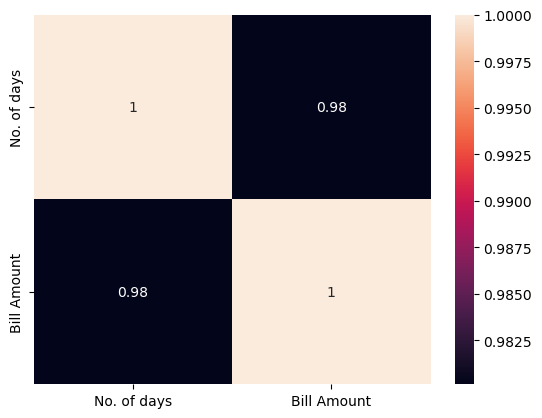

In [8]:
# Visualize the correlation between diff. columns using heatmap
sns.heatmap(df.corr(), annot= True)
plt.show()

Bill Amount has a strong positive correlation of 98% with No. of days.

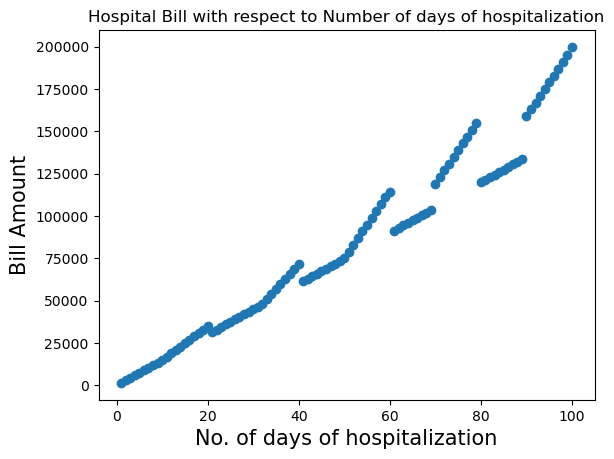

In [9]:
plt.scatter(df['No. of days'], df['Bill Amount'])
plt.title('Hospital Bill with respect to Number of days of hospitalization')
plt.xlabel('No. of days of hospitalization', fontsize = 15)
plt.ylabel('Bill Amount', fontsize = 15)
plt.show()

The scatterplot shows a linear trend between the two columns, this make it fit to use a Linear Regression model.

In [16]:
# Split the data into regressor and target variable
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [20]:
# Split the data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [22]:
# Instantiate a linear regression model
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

In [23]:
# Let us check the residual error in prediction
error = Y_test - Y_pred  # error = ground truth - predicted values

In [24]:
error

array([ -2158.41020519,   -987.66174601,  -7426.7782715 , -18548.88863372,
        21938.86598874,  10902.30156272,  -1280.34886081,   2341.41808821,
         4524.58363153,   6329.51612386, -17085.45305974,   5231.72481013,
         4500.09287645,   4573.39343509,   4548.73097341,   4939.20940194,
       -11524.39787864, -12987.83345261,   8694.98867751,    878.15422083,
         5146.52228714,  11170.66962903,   5768.46094276,   4866.08054989,
       -16792.76594495,   6036.82900907,  17792.60828464,  15585.29539944,
        -5377.96846794,   5451.45477948])

We can observe that there are variations in the predicted values from the ground truth.

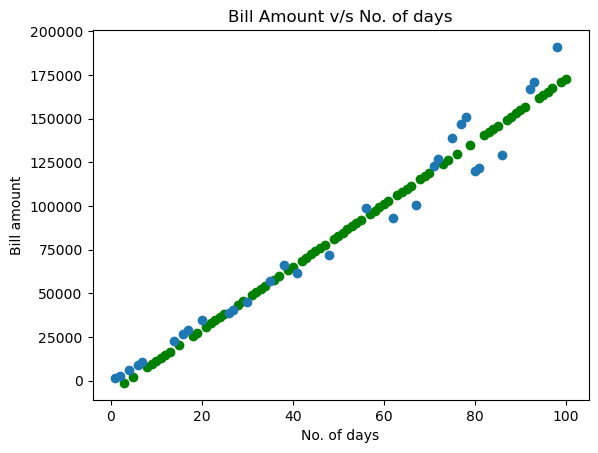

In [25]:
# Let us visualize how our model is predicting
plt.scatter(X_train, lr.predict(X_train), color = 'green')
plt.scatter(X_test, Y_test)
plt.title('Bill Amount v/s No. of days')
plt.xlabel('No. of days')
plt.ylabel('Bill amount')
plt.show()

The scatter plot shows that our model predictions depicted by the green dots are much closer to the test data ground truth.

In [27]:
# We can check the optimum values of Beta coeff.
print(lr.coef_)
print(lr.intercept_)

[1792.6871148]
-6622.203238658825


In [28]:
# Let us check the Coef. of Determination or R2 score to know about the goodness of our model
sklearn.metrics.r2_score(Y_test, Y_pred)

0.9686209318828488

R2 score is 0.97 which is close to 1 depicting that our model predictions have high accuracy.

Glad to learn:)